In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\KNN\Zoo.csv")

In [5]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
data.shape

(101, 18)

In [8]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# EDA:

**Missing values:**

In [9]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

There are no missing values in the data.

**Verifying Unique values:**

In [10]:
data.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [11]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

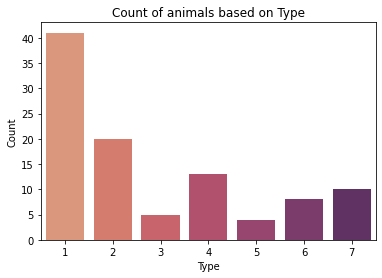

In [12]:
sns.countplot(x="type", data = data, palette = 'flare')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of animals based on Type')

plt.show()

We can see that more number of **Type 1** animals are present in data, where as very few number of **Type 5** animals are there.

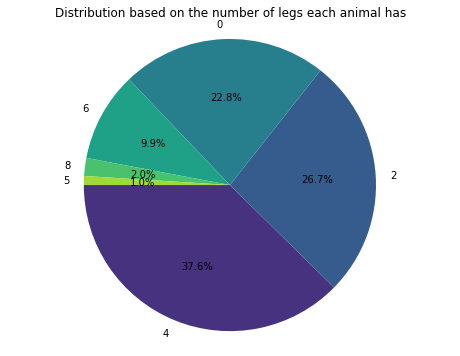

In [13]:
legs_counts = data['legs'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(legs_counts, labels=legs_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('viridis'))
plt.title('Distribution based on the number of legs each animal has')
plt.axis('equal') 
plt.show()

Around 37.6% of animals have 4 legs.
22.8% of the animals have no legs. It means that 22.8% of the data consists of reptiles.

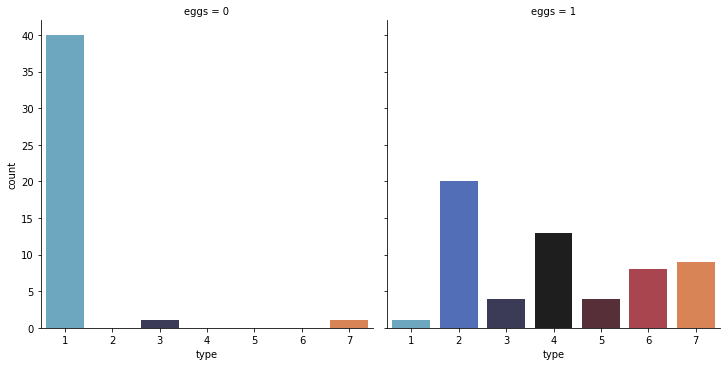

In [14]:
sns.catplot(x='type', col='eggs', kind='count', data=data, palette='icefire')

Maximum number of **Type 1** animals do not lay eggs

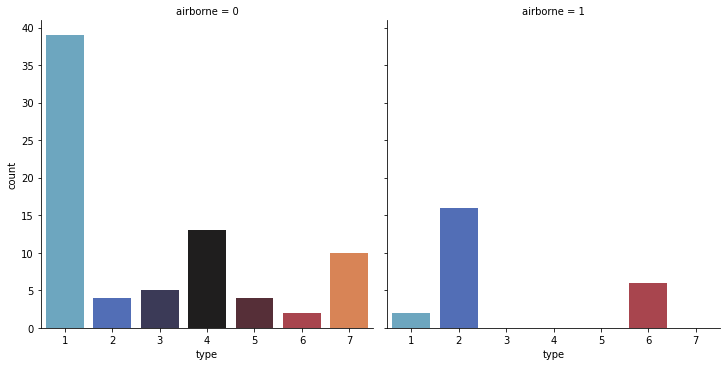

In [15]:
sns.catplot(x='type', col='airborne', kind='count', data=data, palette='icefire')

Here we can see that the animals from **Type 2, 6 and 1** are airborne

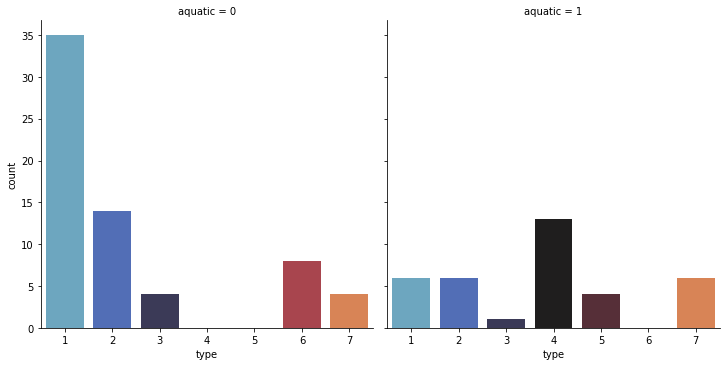

In [16]:
sns.catplot(x='type', col='aquatic', kind='count', data=data, palette='icefire')

All **Type 4 and Type 5** animals are aquatic. 
Where as all **Type 6** animals are non-aquatic.

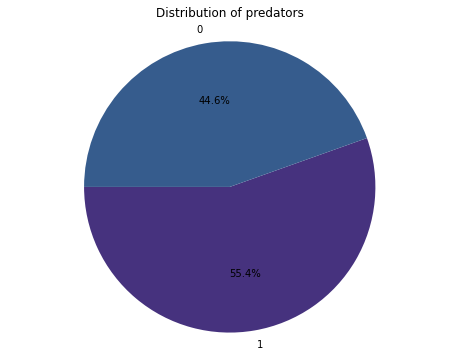

In [17]:
predators_counts = data['predator'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(predators_counts, labels=predators_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('viridis'))
plt.title('Distribution of predators')
plt.axis('equal') 
plt.show()

Most of the data is of predators which is around **55.4%**

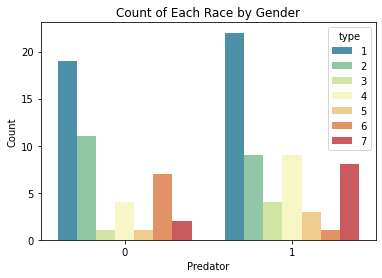

In [18]:
sns.countplot(data=data, x='predator', hue='type', palette = 'Spectral_r')
plt.xlabel('Predator')
plt.ylabel('Count')
plt.title('Count of Each Race by Gender')
plt.show()

Maximum number of **Type 1** animals are predators

**Label encoding required variables:**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
data_encoded = data.apply(le.fit_transform)

In [22]:
data_encoded.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,2,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,2,1,0,1,0


# Train-Test Splitting:

In [23]:
x = data_encoded.drop('type', axis = 1)
y = data_encoded['type']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# KNN algorithm:

In [26]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn.predict(x_test)

**Evaluating the model:**

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [33]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.48
Precision: 0.40
Recall: 0.48
F1-Score: 0.42


# Cross-Validation to Choose the Best K and Distance Metric:

In [34]:
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] 
}

In [35]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             scoring='accuracy')

In [36]:
best_params = grid_search.best_params_
print(f"Best Parameters:\n {best_params}")

Best Parameters:
 {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1}


In [37]:
# Training the KNN model with the best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1)

In [38]:
# Make predictions on the test set
y_pred = knn_best.predict(x_test)

In [39]:
# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred)
precision_best = precision_score(y_test, y_pred, average='weighted')
recall_best = recall_score(y_test, y_pred, average='weighted')
f1_best = f1_score(y_test, y_pred, average='weighted')

In [40]:
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1-Score: {f1_best:.2f}")

Accuracy: 0.76
Precision: 0.71
Recall: 0.76
F1-Score: 0.72


In [41]:
result = pd.DataFrame({
    'Algorithm': ['knn', 'knn_best'],
    'Accuracy': [accuracy, accuracy_best],
    'Precision': [precision, precision_best],
    'Recall': [recall, recall_best],
    'F1_score': [f1, f1_best]  
})

In [42]:
print('Comparison of Results for model evaluation:')
result

Comparison of Results for model evaluation:


,Algorithm,Accuracy,Precision,Recall,F1_score
0,knn,0.476190,0.401361,0.476190,0.420635
1,knn_best,0.761905,0.712698,0.761905,0.723350


# Conclusion:

1) The accuracy of the baseline KNN model (0.476190) is significantly lower than that of the optimized KNN model (knn_best) which achieved an accuracy of 0.761905. **This indicates that the optimized model is much better at correctly predicting the class labels.**

2) The precision of the baseline KNN model (0.401361) is lower compared to the optimized KNN model (0.712698). 

**Thus we can conclude that, the optimized KNN model (knn_best) performs significantly better across all evaluation metrics (accuracy, precision, recall, and F1-score) compared to the baseline KNN model**

**Visualizing the CV results:**

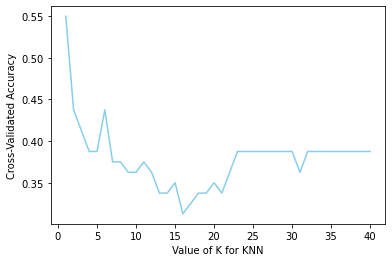

In [43]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train , cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, color = 'skyblue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions:

**1) What are the key hyperparameters in KNN?**

The key hyperparameters in KNN are:


Number of Neighbors (n_neighbors): Determines the number of neighbors to consider for classification or regression.

Distance Metric (metric): Defines how the distance between points is calculated (e.g., Euclidean, Manhattan).

Weight Function (weights): Determines how the influence of each neighbor is weighted (e.g., uniform, distance).

Algorithm (algorithm): Specifies the algorithm used to compute the nearest neighbors (e.g., auto, ball_tree, kd_tree, brute).

P Parameter (p): Relevant for the Minkowski distance metric, defining the power parameter (e.g., p=1 for Manhattan, p=2 for Euclidean).

**2) What distance metrics can be used in KNN?**

The distance metrics that can be used in KNN are:

Euclidean Distance: Straight-line distance between two points in Euclidean space.

Manhattan Distance (also known as L1 norm or Taxicab distance): Sum of the absolute differences between the coordinates of the points.

Minkowski Distance: Generalization of both Euclidean and Manhattan distances. Parameterized by p.